In [1]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

2024-03-04 20:43:11,792 - c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\backend\__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2024-03-04 20:43:22,656 - c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


2024-03-04 20:43:22,694 - c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


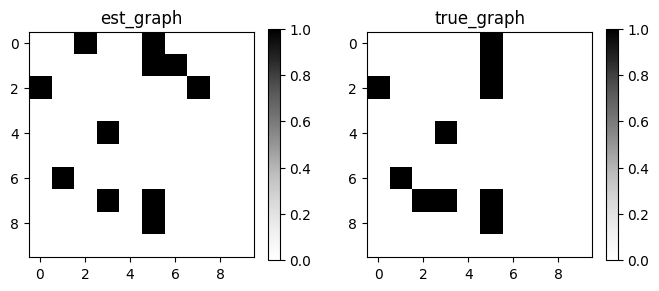

In [2]:
# data simulation, simulate true causal dag and train_data.
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10, 
                                      weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', 
                        sem_type='gauss')
true_causal_matrix, X = dataset.B, dataset.X

# structure learning
pc = PC()
pc.learn(X)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, true_causal_matrix, 'result')

In [3]:
# calculate metrics
mt = MetricsDAG(pc.causal_matrix, true_causal_matrix)
print(mt.metrics)

{'fdr': 0.1111, 'tpr': 0.8, 'fpr': 0.0286, 'shd': 2, 'nnz': 9, 'precision': 0.7273, 'recall': 0.8, 'F1': 0.7619, 'gscore': 0.5}


c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_tp =  (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:195: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_fn_r = (W_p - W_true).applymap(lambda elem:1 if elem==1 else 0).sum(axis=1).sum()
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:221: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TP = (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()
